<a href="https://colab.research.google.com/github/AyazHasanov/Python_Data_Analysis_Projects/blob/main/Netflix_Movies_and_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/netflix_titles.csv')

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [29]:

df.info()        # Summary of the DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [30]:
df.shape         # Get the number of rows and columns


(8807, 12)

In [31]:
df.columns       # List of column names

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [32]:
# After exploring the columns and their data types, it seems some data types
# should be converted

# Converting 'date_added' to datetime, handling errors and trimming leading/trailing spaces
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y', errors='coerce')
# Converting 'release_year' to datetime, using infer_datetime_format for flexibility
df['release_year'] = pd.to_datetime(df['release_year'], infer_datetime_format=True, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   datetime64[ns]
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](2), object(10)
memory usage: 825.8+ KB


<ipython-input-32-4a2abe91182a>:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['release_year'] = pd.to_datetime(df['release_year'], infer_datetime_format=True, errors='coerce')


In [33]:
# There is not any duplicates

df.duplicated().sum()

0

In [34]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,1970-01-01 00:00:00.000002020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,1970-01-01 00:00:00.000002021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1970-01-01 00:00:00.000001993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,1970-01-01 00:00:00.000002021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,1970-01-01 00:00:00.000002021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [35]:
# Rename the column in place  - listed_in >>>>> genre
df.rename(columns={'listed_in': 'genre'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   datetime64[ns]
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  genre         8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](2), object(10)
memory usage: 825.8+ KB


In [36]:
genre_counts = df['genre'].value_counts().sort_values(ascending = False)
genre_counts

,count
genre,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
...,...
"Classic Movies, Cult Movies, Documentaries",1
"Action & Adventure, Cult Movies, Dramas",1
"Classic Movies, Dramas, LGBTQ Movies",1


<ipython-input-41-4ecc0fd2dc32>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


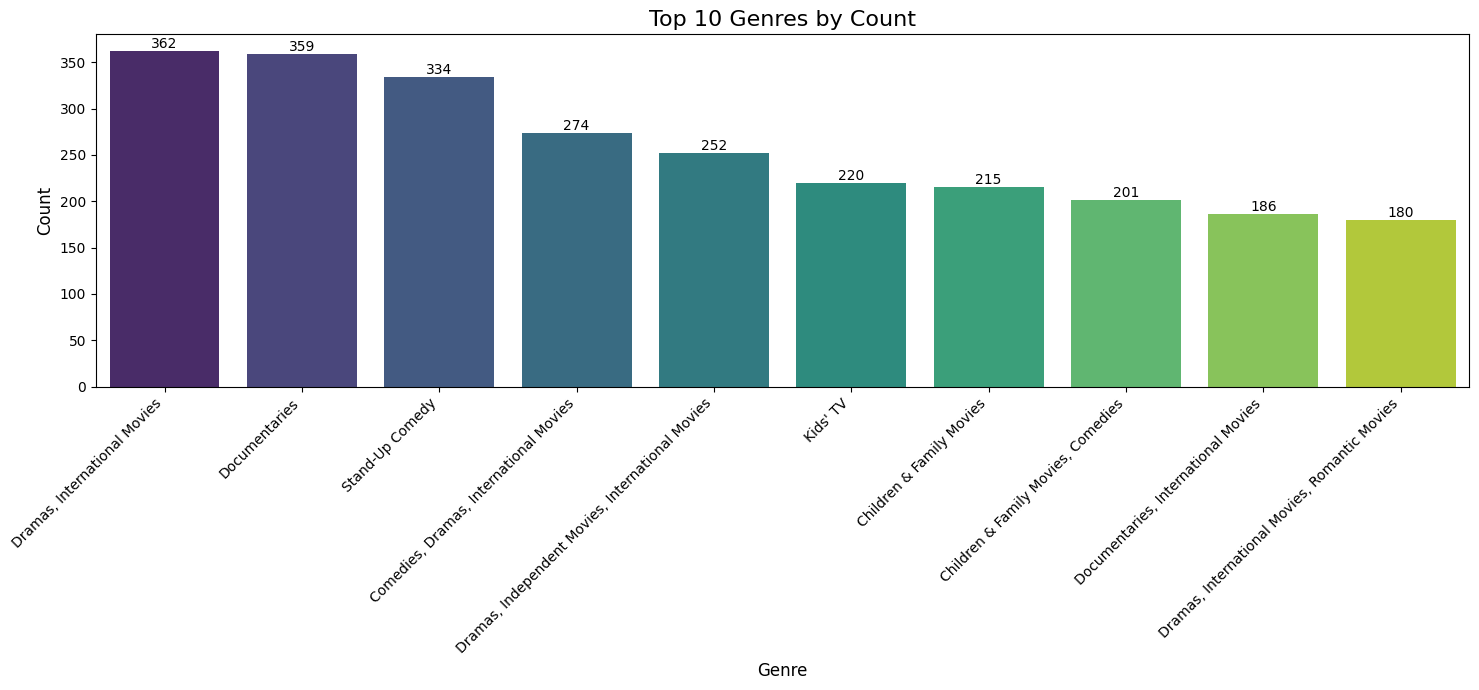

In [41]:
# Create the bar chart
plt.figure(figsize=(15, 7))
bar_plot = sns.barplot(
    x=genre_counts.head(10).index,  # Top 10 genres
    y=genre_counts.head(10).values,
    palette="viridis"
)

# Add values on top of each bar
for bar in bar_plot.patches:
    bar_plot.annotate(
        format(bar.get_height(), '.0f'),  # Format the value
        (bar.get_x() + bar.get_width() / 2., bar.get_height()),  # Position
        ha='center', va='center',        # Horizontal and vertical alignment
        size=10,                         # Font size
        xytext=(0, 5),                   # Offset from the bar (x=0, y=5)
        textcoords='offset points'       # Interpret xytext as an offset
    )

# Customize the chart
plt.title("Top 10 Genres by Count", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Show the chart
plt.show()

In [42]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,1970-01-01 00:00:00.000002020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [46]:
# Checking the movies counts by countries

country_counts = df['country'].value_counts().sort_values(ascending = False).head(10)
country_counts

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


<ipython-input-47-da89e224a045>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


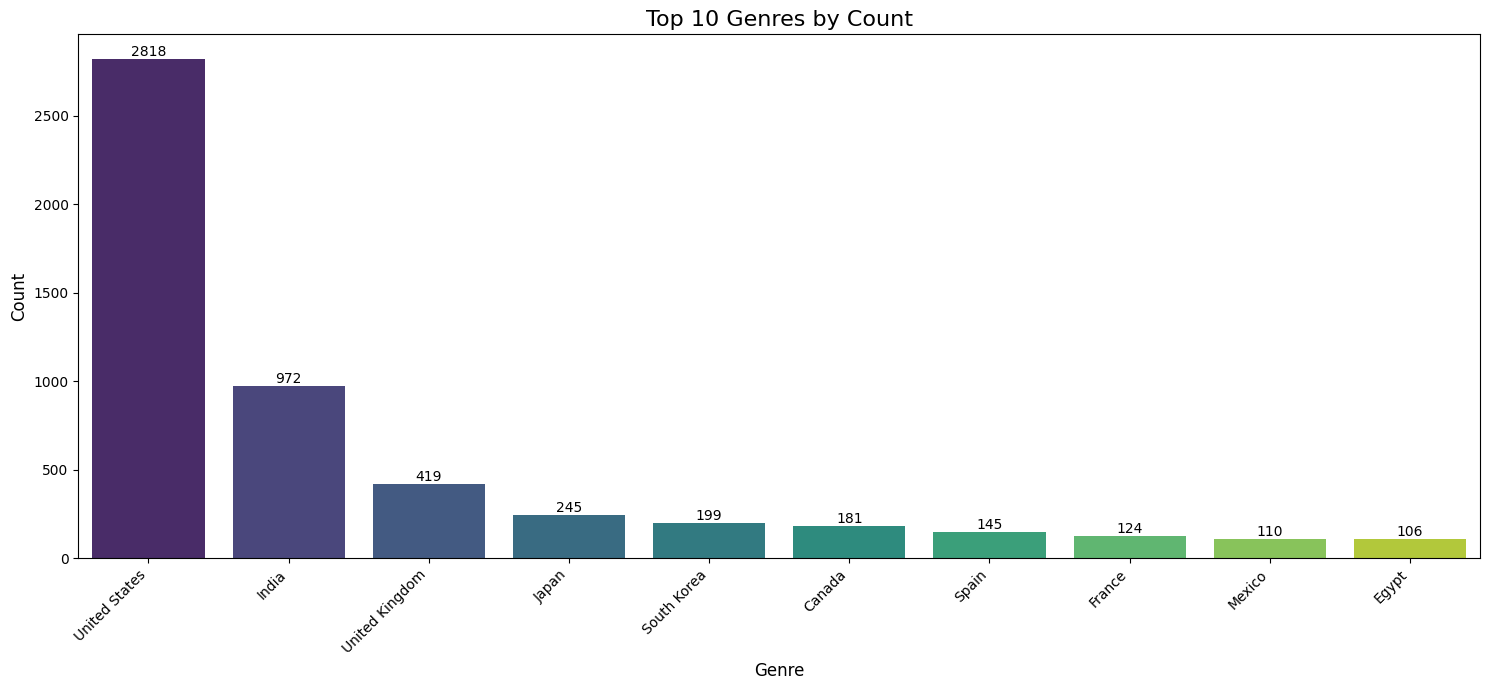

In [47]:
# Create the bar chart
plt.figure(figsize=(15, 7))
bar_plot = sns.barplot(
    x=country_counts.head(10).index,  # Top 10 genres
    y=country_counts.head(10).values,
    palette="viridis"
)

# Add values on top of each bar
for bar in bar_plot.patches:
    bar_plot.annotate(
        format(bar.get_height(), '.0f'),  # Format the value
        (bar.get_x() + bar.get_width() / 2., bar.get_height()),  # Position
        ha='center', va='center',        # Horizontal and vertical alignment
        size=10,                         # Font size
        xytext=(0, 5),                   # Offset from the bar (x=0, y=5)
        textcoords='offset points'       # Interpret xytext as an offset
    )

# Customize the chart
plt.title("Top 10 Genres by Count", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Show the chart
plt.show()

In [49]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,1970-01-01 00:00:00.000002020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [51]:
# There are some NA values in the 'director' column

df['director'].isna().value_counts()

,count
director,
False,6173
True,2634


In [53]:
# Replacing NA values by Unknown

df['director'].fillna('Unknown', inplace=True)

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,1970-01-01 00:00:00.000002020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,NaN,NaN,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [67]:
# Checking the movies counts by directors
# Exclude rows where director is 'Unknown'
filtered_df = df[df['director'] != 'Unknown']
director_movie_counts = filtered_df['director'].value_counts().sort_values(ascending = False).head(10)
director_movie_counts

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,14
Cathy Garcia-Molina,13
Youssef Chahine,12
Jay Chapman,12
Martin Scorsese,12


In [71]:
# Rename 'release_date' column to 'release_year'
df = df.rename(columns={'release_year': 'release_date'})

# Check the result
df.head()


,show_id,type,title,director,cast,country,date_added,release_date,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,1970-01-01 00:00:00.000002020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,NaN,NaN,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,1970-01-01 00:00:00.000002021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [74]:
df['release_year'] = df['release_date'].dt.year
df.tail(100)

,show_id,type,title,director,cast,country,date_added,release_date,rating,duration,genre,description,release_year
8707,s8708,Movie,"We, the Marines",Greg MacGillivray,NaN,United States,2018-07-01,1970-01-01 00:00:00.000002017,TV-PG,38 min,"Documentaries, International Movies",Narrated by actor and former Marine Gene Hackm...,1970
8708,s8709,Movie,We're No Animals,Alejandro Agresti,"John Cusack, Paul Hipp, Kevin Morris, Alejandr...","United States, Argentina",2017-08-15,1970-01-01 00:00:00.000002015,TV-MA,94 min,"Comedies, Dramas, Independent Movies","Unhappy with his commercial film work, a jaded...",1970
8709,s8710,Movie,Weather forecast,Antoni Krauze,"Halina Buyno-Łoza, Zofia Cegiełkowa, Barbara C...",Poland,2019-10-01,1970-01-01 00:00:00.000001983,TV-MA,91 min,"Dramas, International Movies",When a delivery of coffins foreshadows a harsh...,1970
8710,s8711,TV Show,Weeds,Unknown,"Mary-Louise Parker, Hunter Parrish, Alexander ...",United States,2014-04-01,1970-01-01 00:00:00.000002012,TV-MA,8 Seasons,"TV Comedies, TV Dramas",A suburban mother starts selling marijuana to ...,1970
8711,s8712,Movie,Weeds on Fire,Chi Fat Chan,"Liu Kai Chi, Lam Yiu-sing, Tony Tsz-Tung Wu, P...",Hong Kong,2018-09-27,1970-01-01 00:00:00.000002016,TV-MA,95 min,"Dramas, Independent Movies, International Movies","In 1980s Hong Kong, a school principal forms a...",1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,1970-01-01 00:00:00.000002007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",1970
8803,s8804,TV Show,Zombie Dumb,Unknown,NaN,NaN,2019-07-01,1970-01-01 00:00:00.000002018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",1970
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,1970-01-01 00:00:00.000002009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,1970
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,1970-01-01 00:00:00.000002006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1970


In [73]:
counts_by_year = df['release_year'].value_counts().sort_values(ascending = False)
counts_by_year

,count
release_year,
1970,8807


In [76]:
# It seems all release_year is populated only as 1970 which is not correct
# need to drop both columns

df.drop(columns=['release_year','release_date'], inplace=True)
df.head()

,show_id,type,title,director,cast,country,date_added,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,NaN,NaN,2021-09-24,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [78]:
counts_by_rating = df['rating'].value_counts().sort_values(ascending = False).head(10)
counts_by_rating

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


<ipython-input-79-8e365a8e1418>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


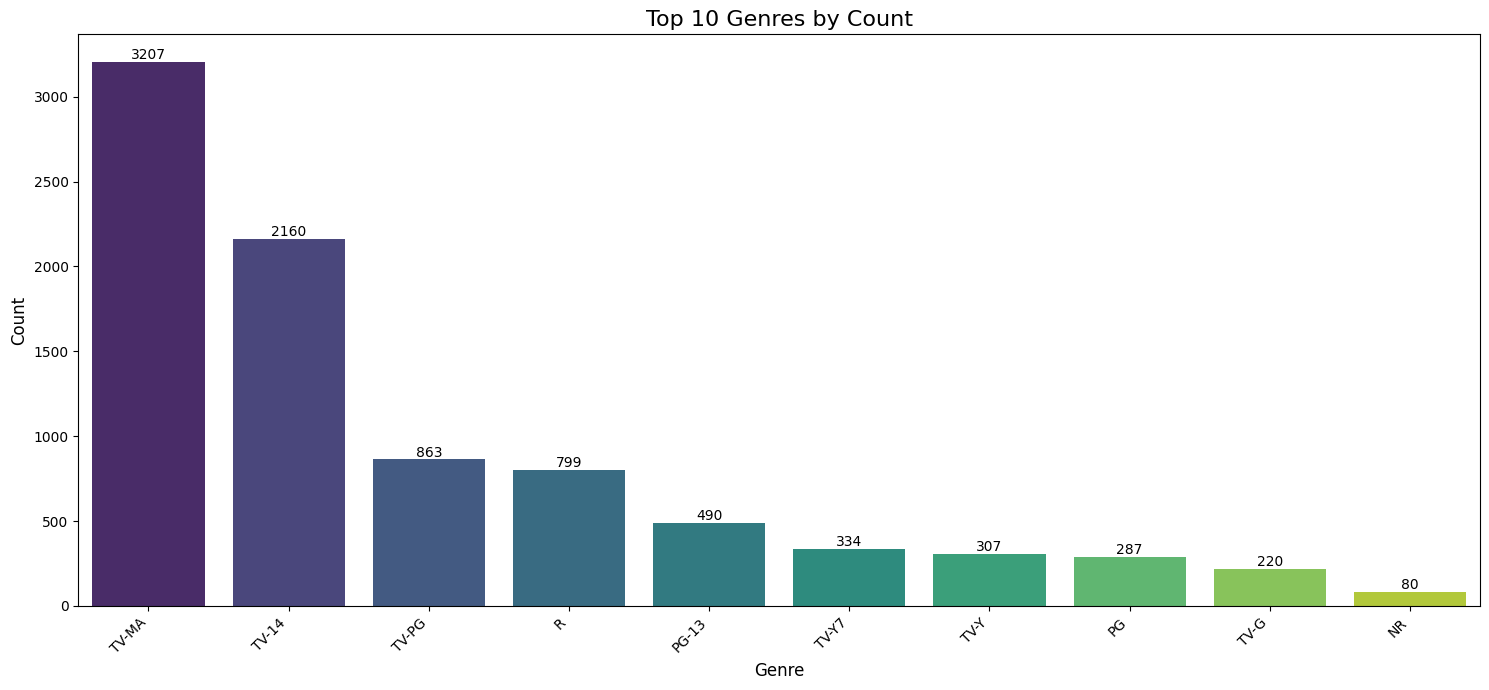

In [79]:
# Create the bar chart
plt.figure(figsize=(15, 7))
bar_plot = sns.barplot(
    x=counts_by_rating.head(10).index,  # Top 10 genres
    y=counts_by_rating.head(10).values,
    palette="viridis"
)

# Add values on top of each bar
for bar in bar_plot.patches:
    bar_plot.annotate(
        format(bar.get_height(), '.0f'),  # Format the value
        (bar.get_x() + bar.get_width() / 2., bar.get_height()),  # Position
        ha='center', va='center',        # Horizontal and vertical alignment
        size=10,                         # Font size
        xytext=(0, 5),                   # Offset from the bar (x=0, y=5)
        textcoords='offset points'       # Interpret xytext as an offset
    )

# Customize the chart
plt.title("Top 10 Genres by Count", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Show the chart
plt.show()